## Objective - To Build a Predictive Model to predict the stock prices of a Company

### Decided Upon Method - LSTM Neural Network and a combincation of the closing stock price for the previous 60 days

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as web
import yfinance as yf
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

In [ ]:
stock_data = yf.download('TSLA',  start='2019-01-01', end='2024-10-23')
stock_data = stock_data.reset_index()
stock_data

[*********************100%***********************]  1 of 1 completed


Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA
0,2019-01-02 00:00:00+00:00,20.674667,20.674667,21.008667,19.920000,20.406668,174879000
1,2019-01-03 00:00:00+00:00,20.024000,20.024000,20.626667,19.825333,20.466667,104478000
2,2019-01-04 00:00:00+00:00,21.179333,21.179333,21.200001,20.181999,20.400000,110911500
3,2019-01-07 00:00:00+00:00,22.330667,22.330667,22.449333,21.183332,21.448000,113268000
4,2019-01-08 00:00:00+00:00,22.356667,22.356667,22.934000,21.801332,22.797333,105127500
...,...,...,...,...,...,...,...
1457,2024-10-16 00:00:00+00:00,221.330002,221.330002,222.820007,218.929993,221.399994,49632800
1458,2024-10-17 00:00:00+00:00,220.889999,220.889999,222.080002,217.899994,221.589996,50791800
1459,2024-10-18 00:00:00+00:00,220.699997,220.699997,222.279999,219.229996,220.710007,49611900


In [ ]:
# Trying to see the shape of the file and the data type we have

print(stock_data.shape)
stock_data.columns = [col.replace(" ", "_") if isinstance(col, str) else '_'.join(col) for col in stock_data.columns]

stock_data.dtypes

(1462, 7)


,0
Date_,"datetime64[ns, UTC]"
Adj Close_TSLA,float64
Close_TSLA,float64
High_TSLA,float64
Low_TSLA,float64
Open_TSLA,float64
Volume_TSLA,int64


In [ ]:
stock_data_filtered = stock_data[['Date_', 'Close_TSLA']]
stock_data_filtered.rename(columns={'Close_TSLA': 'Close', 'Date_':'Date'}, inplace=True)
stock_data_filtered['Date'] = stock_data_filtered['Date'].dt.date

<ipython-input-4-77a199dc9e4e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data_filtered.rename(columns={'Close_TSLA': 'Close', 'Date_':'Date'}, inplace=True)
<ipython-input-4-77a199dc9e4e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data_filtered['Date'] = stock_data_filtered['Date'].dt.date


In [ ]:
stock_data_filtered['Close'] = stock_data_filtered['Close'].astype(float).round(2)
stock_data_filtered

date = stock_data_filtered['Date']

<ipython-input-6-b75e7cf95c47>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data_filtered['Close'] = stock_data_filtered['Close'].astype(float).round(2)


Text(0, 0.5, 'Close Price USD ($)')

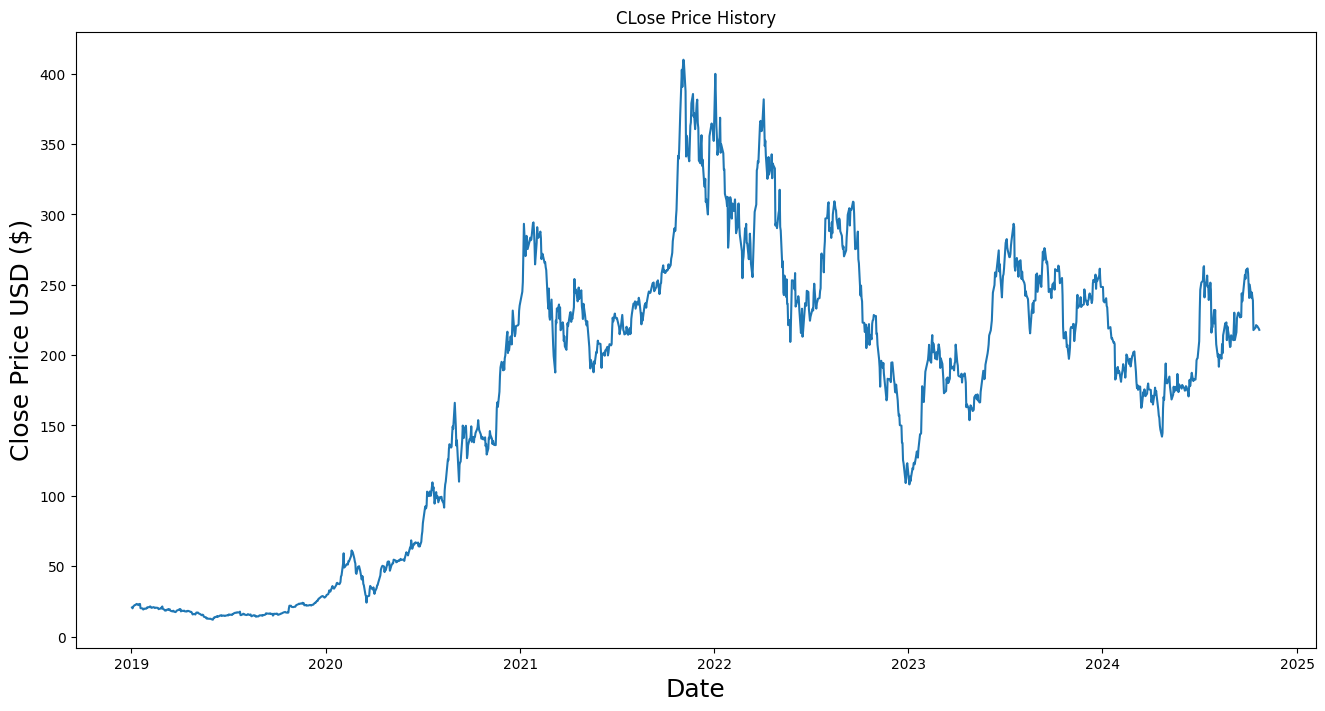

In [ ]:
plt.figure(figsize=(16,8))
plt.title('CLose Price History')
plt.plot(stock_data_filtered['Date'] ,stock_data_filtered['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)

In [ ]:
for i in range(60):
  stock_data_filtered[f'Close-{i+1}'] = np.nan

stock_data_filtered

<ipython-input-10-ed62836870ec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data_filtered[f'Close-{i+1}'] = np.nan
<ipython-input-10-ed62836870ec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data_filtered[f'Close-{i+1}'] = np.nan
<ipython-input-10-ed62836870ec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

,Date,Close,Close-1,Close-2,Close-3,Close-4,Close-5,Close-6,Close-7,Close-8,...,Close-51,Close-52,Close-53,Close-54,Close-55,Close-56,Close-57,Close-58,Close-59,Close-60
0,2019-01-02,20.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-01-03,20.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-01-04,21.18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-01-07,22.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-01-08,22.36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1457,2024-10-16,221.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1458,2024-10-17,220.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1459,2024-10-18,220.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1460,2024-10-21,218.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# stock_data_filtered['Close'] = stock_data_filtered['Close'].astype(float)
stock_data_filtered['Date'] = pd.to_datetime(stock_data_filtered['Date'])

# Then you can use the .dt accessor:
stock_data_filtered['Date'].dt.date
stock_data_filtered.dtypes

,0
Date,datetime64[ns]
Close,float64
Close-1,float64
Close-2,float64
Close-3,float64
...,...
Close-56,float64
Close-57,float64
Close-58,float64
Close-59,float64


In [ ]:
len(stock_data_filtered)

1462

In [ ]:
for i in range(60, len(stock_data_filtered)):
  for j in range(1, 61):
    stock_data_filtered[f'Close-{j}'].iloc[i] = stock_data_filtered['Close'].iloc[i-j]

stock_data_filtered.tail(10)

Streaming output truncated to the last 5000 lines.
See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  stock_data_filtered[f'Close-{j}'].iloc[i] = stock_data_filtered['Close'].iloc[i-j]
<ipython-input-15-adf77e713140>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data_filtered[f'Close-{j}'].iloc[i] = stock_data_filtered['Close'].iloc[i-j]
<ipython-input-15-adf77e713140>:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermedia

,Date,Close,Close-1,Close-2,Close-3,Close-4,Close-5,Close-6,Close-7,Close-8,...,Close-51,Close-52,Close-53,Close-54,Close-55,Close-56,Close-57,Close-58,Close-59,Close-60
1452,2024-10-09,241.05,244.50,240.83,250.08,240.66,249.02,258.02,261.63,260.46,...,232.10,219.80,220.25,215.99,246.38,251.51,239.20,249.23,248.50,256.56
1453,2024-10-10,238.77,241.05,244.50,240.83,250.08,240.66,249.02,258.02,261.63,...,222.62,232.10,219.80,220.25,215.99,246.38,251.51,239.20,249.23,248.50
1454,2024-10-11,217.80,238.77,241.05,244.50,240.83,250.08,240.66,249.02,258.02,...,232.07,222.62,232.10,219.80,220.25,215.99,246.38,251.51,239.20,249.23
1455,2024-10-14,219.16,217.80,238.77,241.05,244.50,240.83,250.08,240.66,249.02,...,216.86,232.07,222.62,232.10,219.80,220.25,215.99,246.38,251.51,239.20
1456,2024-10-15,219.57,219.16,217.80,238.77,241.05,244.50,240.83,250.08,240.66,...,207.67,216.86,232.07,222.62,232.10,219.80,220.25,215.99,246.38,251.51
1457,2024-10-16,221.33,219.57,219.16,217.80,238.77,241.05,244.50,240.83,250.08,...,198.88,207.67,216.86,232.07,222.62,232.10,219.80,220.25,215.99,246.38
1458,2024-10-17,220.89,221.33,219.57,219.16,217.80,238.77,241.05,244.50,240.83,...,200.64,198.88,207.67,216.86,232.07,222.62,232.10,219.80,220.25,215.99
1459,2024-10-18,220.70,220.89,221.33,219.57,219.16,217.80,238.77,241.05,244.50,...,191.76,200.64,198.88,207.67,216.86,232.07,222.62,232.10,219.80,220.25
1460,2024-10-21,218.85,220.70,220.89,221.33,219.57,219.16,217.80,238.77,241.05,...,198.84,191.76,200.64,198.88,207.67,216.86,232.07,222.62,232.10,219.80
1461,2024-10-22,217.97,218.85,220.70,220.89,221.33,219.57,219.16,217.80,238.77,...,200.00,198.84,191.76,200.64,198.88,207.67,216.86,232.07,222.62,232.10


In [ ]:
# Price querying using DataFrame

date_to_compare_1 = pd.to_datetime('2021-10-10').date()
date_to_compare_2 = pd.to_datetime('2021-10-14').date()
sample = stock_data_filtered[(stock_data_filtered['Date'] >= date_to_compare_1) &
 (stock_data_filtered['Date'] <= date_to_compare_2)]


sample = sample.sort_values(by='Close', ascending = False)
print(sample['Close'].iloc[1])

TypeError: Invalid comparison between dtype=datetime64[ns] and date

### We will try to predict using the closing price data for the previous 60 days. We will try to convert it into a numpy array

In [ ]:
# storing the filtered dataframe into another variable

dataset = stock_data_filtered[stock_data_filtered['Close-1'].notna()]
dataset

,Date,Close,Close-1,Close-2,Close-3,Close-4,Close-5,Close-6,Close-7,Close-8,...,Close-51,Close-52,Close-53,Close-54,Close-55,Close-56,Close-57,Close-58,Close-59,Close-60
60,2019-03-29,18.66,18.57,18.32,17.85,17.36,17.64,18.27,18.24,17.83,...,22.96,22.29,23.15,23.00,22.57,22.36,22.33,21.18,20.02,20.67
61,2019-04-01,19.28,18.66,18.57,18.32,17.85,17.36,17.64,18.27,18.24,...,23.07,22.96,22.29,23.15,23.00,22.57,22.36,22.33,21.18,20.02
62,2019-04-02,19.06,19.28,18.66,18.57,18.32,17.85,17.36,17.64,18.27,...,23.15,23.07,22.96,22.29,23.15,23.00,22.57,22.36,22.33,21.18
63,2019-04-03,19.45,19.06,19.28,18.66,18.57,18.32,17.85,17.36,17.64,...,20.15,23.15,23.07,22.96,22.29,23.15,23.00,22.57,22.36,22.33
64,2019-04-04,17.85,19.45,19.06,19.28,18.66,18.57,18.32,17.85,17.36,...,19.93,20.15,23.15,23.07,22.96,22.29,23.15,23.00,22.57,22.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1457,2024-10-16,221.33,219.57,219.16,217.80,238.77,241.05,244.50,240.83,250.08,...,198.88,207.67,216.86,232.07,222.62,232.10,219.80,220.25,215.99,246.38
1458,2024-10-17,220.89,221.33,219.57,219.16,217.80,238.77,241.05,244.50,240.83,...,200.64,198.88,207.67,216.86,232.07,222.62,232.10,219.80,220.25,215.99
1459,2024-10-18,220.70,220.89,221.33,219.57,219.16,217.80,238.77,241.05,244.50,...,191.76,200.64,198.88,207.67,216.86,232.07,222.62,232.10,219.80,220.25
1460,2024-10-21,218.85,220.70,220.89,221.33,219.57,219.16,217.80,238.77,241.05,...,198.84,191.76,200.64,198.88,207.67,216.86,232.07,222.62,232.10,219.80


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
dataset.set_index('Date', inplace=True)
closing_price = dataset['Close']
train_prices = closing_price
dataset.drop('Close', axis=1, inplace=True)
dataset.head()

<ipython-input-89-32bd2ea22113>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.drop('Close', axis=1, inplace=True)


,Close-1,Close-2,Close-3,Close-4,Close-5,Close-6,Close-7,Close-8,Close-9,Close-10,...,Close-51,Close-52,Close-53,Close-54,Close-55,Close-56,Close-57,Close-58,Close-59,Close-60
Date,,,,,,,,,,,,,,,,,,,,,
2019-03-29,18.57,18.32,17.85,17.36,17.64,18.27,18.24,17.83,17.97,18.36,...,22.96,22.29,23.15,23.00,22.57,22.36,22.33,21.18,20.02,20.67
2019-04-01,18.66,18.57,18.32,17.85,17.36,17.64,18.27,18.24,17.83,17.97,...,23.07,22.96,22.29,23.15,23.00,22.57,22.36,22.33,21.18,20.02
2019-04-02,19.28,18.66,18.57,18.32,17.85,17.36,17.64,18.27,18.24,17.83,...,23.15,23.07,22.96,22.29,23.15,23.00,22.57,22.36,22.33,21.18
2019-04-03,19.06,19.28,18.66,18.57,18.32,17.85,17.36,17.64,18.27,18.24,...,20.15,23.15,23.07,22.96,22.29,23.15,23.00,22.57,22.36,22.33
2019-04-04,19.45,19.06,19.28,18.66,18.57,18.32,17.85,17.36,17.64,18.27,...,19.93,20.15,23.15,23.07,22.96,22.29,23.15,23.00,22.57,22.36


In [ ]:
closing_price = scaler.fit_transform(closing_price.values.reshape(-1,1))

In [ ]:
closing_price

array([[0.01690785],
       [0.01846548],
       [0.01791277],
       ...,
       [0.52449503],
       [0.51984725],
       [0.51763642]])

In [ ]:
from copy import deepcopy
sample = deepcopy(dataset)
X = scaler.fit_transform(sample.values.reshape(-1,60))

X = X.reshape((X.shape[0], X.shape[1], 1))

X.shape

(1402, 60, 1)

### Splitting into Train, Validation and Test

In [ ]:
# Define split ratios
train_size = int(len(X) * 0.8)   # 80% for training
val_size = int(len(X) * 0.1)     # 10% for validation
test_size = len(X) - train_size - val_size  # 10% for testing
date = dataset.index

In [ ]:
X_train, y_train, date_train, train_prices= X[:train_size], closing_price[:train_size], date[:train_size], train_prices[:train_size]
X_val, y_val, date_val = X[train_size:train_size + val_size], closing_price[train_size:train_size + val_size], date[train_size:train_size + val_size]
X_test, y_test, date_test = X[train_size + val_size:], closing_price[train_size + val_size:], date[train_size + val_size:]

In [ ]:
model = Sequential()

# First LSTM layer
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))  # Dropout to prevent overfitting

# Second LSTM layer
model.add(LSTM(units=50, return_sequences=True)) # Changed return_sequences to True
model.add(Dropout(0.2))

# Third LSTM Layer
model.add(LSTM(units=20, return_sequences=False))
model.add(Dropout(0.2))

# Dense layer to output a single value (the predicted stock price)
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Defining the LSTM Model and Fitting the model into the training data

In [ ]:
# Train the model
history_tesla = model.fit(X_train, y_train, epochs=100, batch_size=1)

Epoch 1/100
1121/1121 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - loss: 0.0204
Epoch 2/100
1121/1121 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - loss: 0.0132
Epoch 3/100
1121/1121 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - loss: 0.0107
Epoch 4/100
1121/1121 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - loss: 0.0102
Epoch 5/100
1121/1121 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - loss: 0.0082
Epoch 6/100
1121/1121 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - loss: 0.0081
Epoch 7/100
1121/1121 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - loss: 0.0074
Epoch 8/100
1121/1121 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - loss: 0.0062
Epoch 9/100
1121/1121 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - loss: 0.0067
Epoch 10/100
1121/1121 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - loss: 0.0073
Epoch 11/100
1121/1121 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - loss: 0.0046
Epoch 12/100
1121/1121 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - loss: 0.0052
Epoch 13/100
1121/1121 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - loss: 0.0047
Epoch 14/100
1121/1121 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - 

In [ ]:
# Make predictions
predicted_prices_val = model.predict(X_val)

# Reshape predicted_prices before inverse transformation
predicted_prices_val = predicted_prices_val.reshape(-1, 1) # Reshape to have 1 column

# Assuming scaler was fit on a 2D array with 60 features:
predicted_prices_val = predicted_prices_val.reshape(-1,1)
# Temporarily reshape predicted prices to 60 features before inverse transform.
# The reshape to the original shape depends on your features.
temp_reshaped=predicted_prices_val.reshape(predicted_prices_val.shape[0],1).repeat(60,axis=1)
predicted_prices_val = scaler.inverse_transform(temp_reshaped)
# Then, select the first column or calculate the mean along the 60 predictions for each row.
predicted_prices_val = predicted_prices_val[:,0] #select the first column
# predicted_prices = predicted_prices.mean(axis=1)  #Calculate the mean along the 60 predictions for each row.

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


In [ ]:
# Make predictions
predicted_prices_test = model.predict(X_test)

# Reshape predicted_prices before inverse transformation
predicted_prices_test = predicted_prices_test.reshape(-1, 1) # Reshape to have 1 column

# Assuming scaler was fit on a 2D array with 60 features:
predicted_prices_test = predicted_prices_test.reshape(-1,1)
# Temporarily reshape predicted prices to 60 features before inverse transform.
# The reshape to the original shape depends on your features.
temp_reshaped=predicted_prices_test.reshape(predicted_prices_test.shape[0],1).repeat(60,axis=1)
predicted_prices_test = scaler.inverse_transform(temp_reshaped)
# Then, select the first column or calculate the mean along the 60 predictions for each row.
predicted_prices_test = predicted_prices_test[:,0] #select the first column
# predicted_prices = predicted_prices.mean(axis=1)  #Calculate the mean along the 60 predictions for each row.

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


### Model Evaluation

In [ ]:
# Create a DataFrame for comparison
# Reshape y_test to match the original shape of the data the scaler was fitted on
# Assuming scaler was fit on a 2D array with 60 features:
temp_reshaped_y_test=y_test.reshape(y_test.shape[0],1).repeat(60,axis=1)
actual_prices_test = scaler.inverse_transform(temp_reshaped_y_test)
# Then, select the first column or calculate the mean along the 60 predictions for each row.
actual_prices_test = actual_prices_test[:,0] #select the first column
# actual_prices = actual_prices.mean(axis=1)  #Calculate the mean along the 60 predictions for each row.

temp_reshaped_y_val=y_val.reshape(y_val.shape[0],1).repeat(60,axis=1)
actual_prices_val = scaler.inverse_transform(temp_reshaped_y_val)
# Then, select the first column or calculate the mean along the 60 predictions for each row.
actual_prices_val = actual_prices_val[:,0] #select the first column
# actual_prices = actual_prices.mean(axis=1)  #Calculate the mean along the 60 predictions for each row.

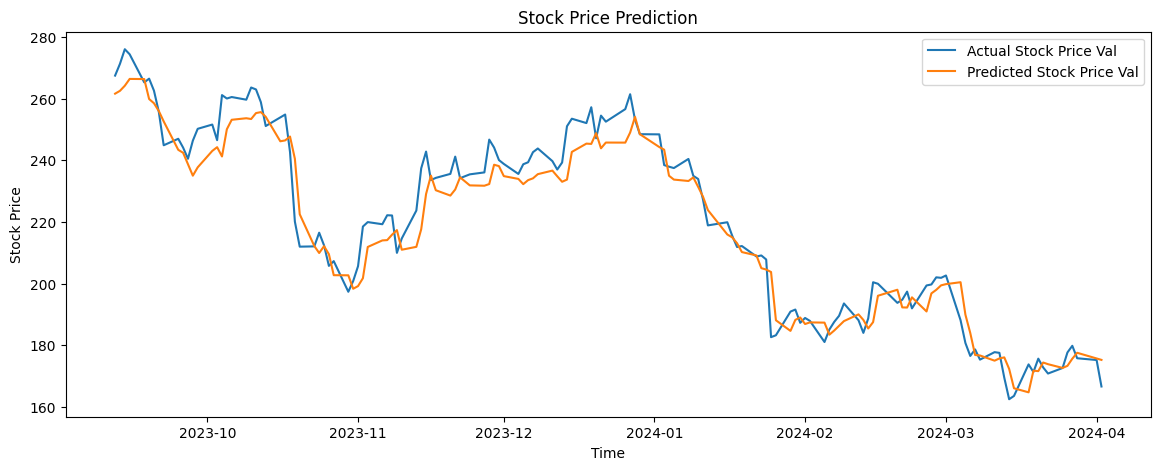

In [ ]:
# Plot the results
plt.figure(figsize=(14, 5))
plt.plot(date_val, actual_prices_val, label='Actual Stock Price Val')
plt.plot(date_val, predicted_prices_val, label='Predicted Stock Price Val')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

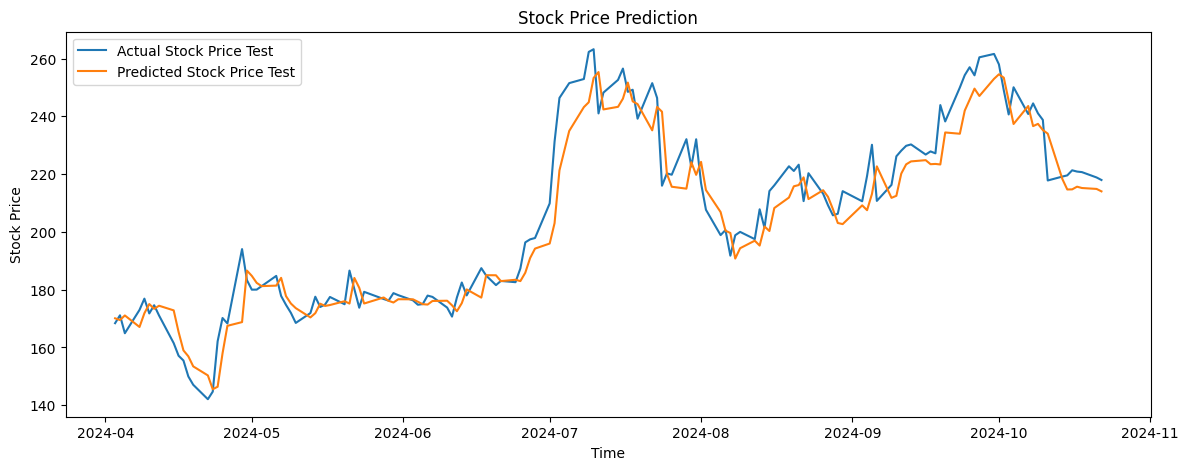

In [ ]:
# Plot the results
plt.figure(figsize=(14, 5))
plt.plot(date_test, actual_prices_test, label='Actual Stock Price Test')
plt.plot(date_test, predicted_prices_test, label='Predicted Stock Price Test')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Assuming `actual_prices` contains the true values and `predicted_prices` contains the model's predictions
mse = mean_squared_error(actual_prices_val, predicted_prices_val)
mae = mean_absolute_error(actual_prices_val, predicted_prices_val)
r2 = r2_score(actual_prices_val, predicted_prices_val)

# Print the MSE, MAE and R2
print(f"Mean Squared Error (MSE) for Validation : {mse}")
print(f"Mean Absolute Error (MAE) for Validation : {mae}")
print(f"R-squared (R2) Score for Validation : {r2}")

Mean Squared Error (MSE) for Validation : 52.53626471258224
Mean Absolute Error (MAE) for Validation : 5.696648018973216
R-squared (R2) Score for Validation : 0.943634510132109


In [ ]:
mse = mean_squared_error(actual_prices_test, predicted_prices_test)
mae = mean_absolute_error(actual_prices_test, predicted_prices_test)
r2 = r2_score(actual_prices_test, predicted_prices_test)

# Print the MSE
print(f"Mean Squared Error (MSE) for Test : {mse}")
print(f"Mean Absolute Error (MAE) for Test : {mae}")
print(f"R-squared (R2) Score for Test : {r2}")

Mean Squared Error (MSE) for Test : 76.5852753251818
Mean Absolute Error (MAE) for Test : 6.6318796101022235
R-squared (R2) Score for Test : 0.9207726138257637


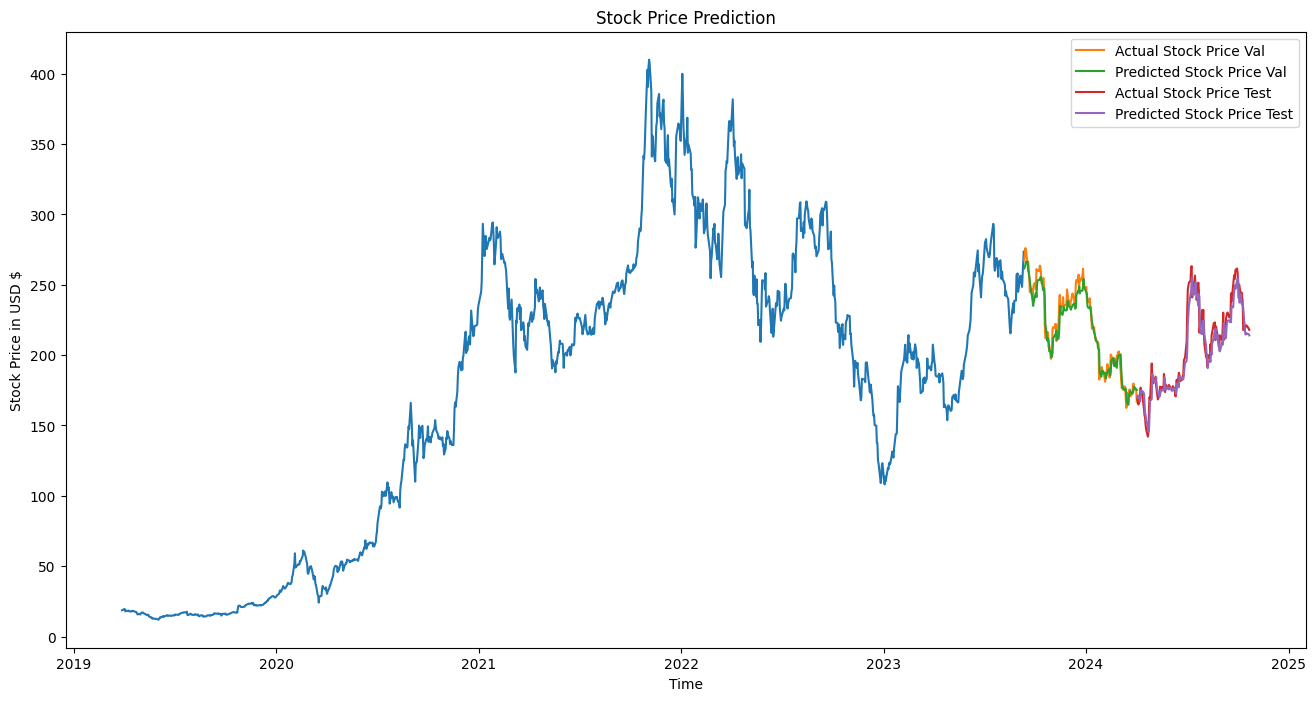

In [ ]:
# Plot the results

plt.figure(figsize=(16, 8))
plt.plot(train_prices)
plt.plot(date_val, actual_prices_val, label='Actual Stock Price Val')
plt.plot(date_val, predicted_prices_val, label='Predicted Stock Price Val')
plt.plot(date_test, actual_prices_test, label='Actual Stock Price Test')
plt.plot(date_test, predicted_prices_test, label='Predicted Stock Price Test')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price in USD $')
plt.legend()
plt.show()